[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!

Descriptive statistics:
       User Rating
count  1056.000000
mean      8.579545
std       2.148805
min       1.000000
25%       8.000000
50%      10.000000
75%      10.000000
max      10.000000

Missing values in each column:
Review Title       0
Review Date        0
Review Content     0
User Rating       10
dtype: int64


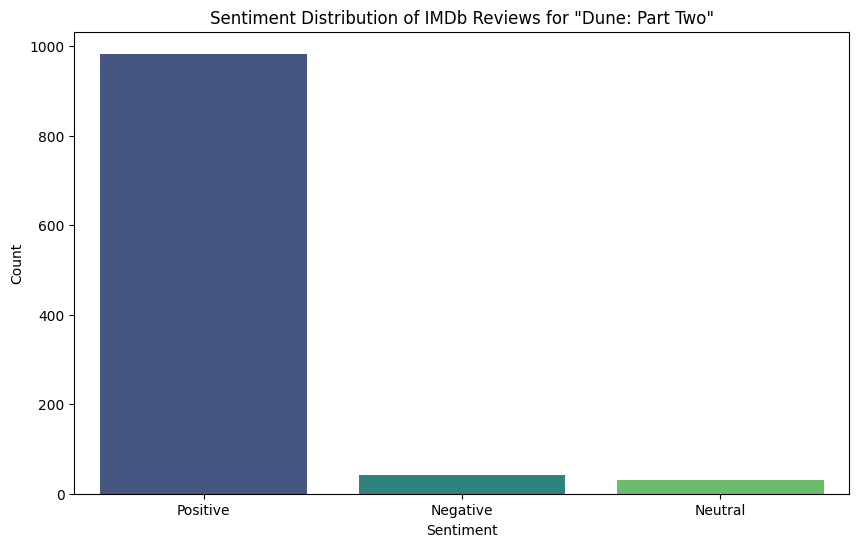

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk


#Download NLTK tokenizer, stopwords, and sentiment analysis tool from NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')


#Dataset
reviews = pd.read_csv('/kaggle/input/dune-part-two-imdb-reviews/dune_2_reviews.csv') 


# Descriptive statistics: user rating _/10 to verify sent analysis
print("\nDescriptive statistics:")
print(reviews.describe())


# Missing values
print("\nMissing values in each column:")
print(reviews.isnull().sum())


#Remove rows with missing user rating --should remove column 1??--
reviews.dropna(subset=[reviews.columns[3]], inplace=True) 


#Prepocess text: remove stopwords & normalize case
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return ' '.join(tokens)


#Apply preprocessing to reviews
reviews['Cleaned Reviews'] = reviews['Review Content'].apply(preprocess_text)


# Sentiment analysis
sent_analyzer = SentimentIntensityAnalyzer()
reviews['Sentiment'] = reviews['Cleaned Reviews'].apply(lambda x: sent_analyzer.polarity_scores(x)['compound'])


#Sentiment categories: negative, positive, neutral 
reviews['Sentiment Category'] = reviews['Sentiment'].apply(lambda x: 'Positive' if x >= 0.2 else 'Negative' if x <= -0.2 else 'Neutral')


# Sentiment distribution visualization
plt.figure(figsize=(10, 6))
sns.countplot(data=reviews, x='Sentiment Category', palette='viridis')
plt.title('Sentiment Distribution of IMDb Reviews for "Dune: Part Two"')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()
